In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
bcancer = load_breast_cancer(as_frame = True)
#bcancer.data

In [4]:
X = bcancer.data
y = bcancer.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


In [6]:
y_test.value_counts()

target
1    71
0    43
Name: count, dtype: int64

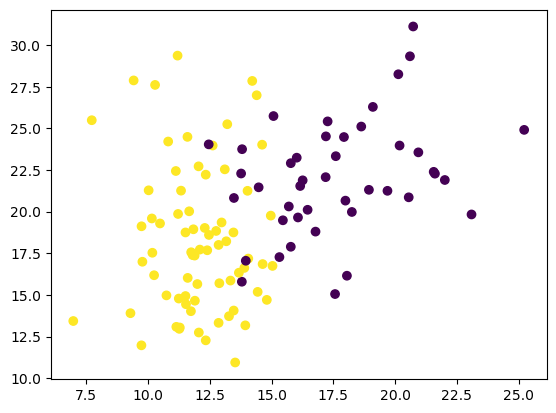

In [7]:
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test)


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [9]:
#linear kernal

linear_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel = 'linear'))
                       ])
linear_svm.fit(X_train,y_train)
y_pred_linear = linear_svm.predict(X_test)

acc_linear = accuracy_score(y_pred_linear,y_test)

#rbf kernel
rbf_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel = 'rbf'))
                       ])
rbf_svm.fit(X_train,y_train)
y_pred_rbf = rbf_svm.predict(X_test)

acc_rbf = accuracy_score(y_pred_rbf,y_test)


print('linear SVM Accuracy', acc_linear)
print('RBF SVM Accuracy', acc_rbf)

linear SVM Accuracy 0.956140350877193
RBF SVM Accuracy 0.9824561403508771


Since RBF SVM outperformed Linear SVM, the dataset exhibits non-linear patterns that a linear hyperplane cannot fully capture

In [10]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'svm__C' : [0.1, 1, 10],
    'svm__gamma' : [0.01, 0.1, 1]
}

grid = GridSearchCV(rbf_svm,
                    grid_params,
                   cv = 5,
                    scoring = 'accuracy'
                   )

grid.fit(X_train,y_train)

print('best_params:', grid.best_params_)
print('best_score:', grid.best_score_)

best_params: {'svm__C': 10, 'svm__gamma': 0.01}
best_score: 0.9736263736263737


In [11]:
best_model = grid.best_estimator_
y_final = best_model.predict(X_test)

print(confusion_matrix(y_test,y_final))
print(classification_report(y_test,y_final))

[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



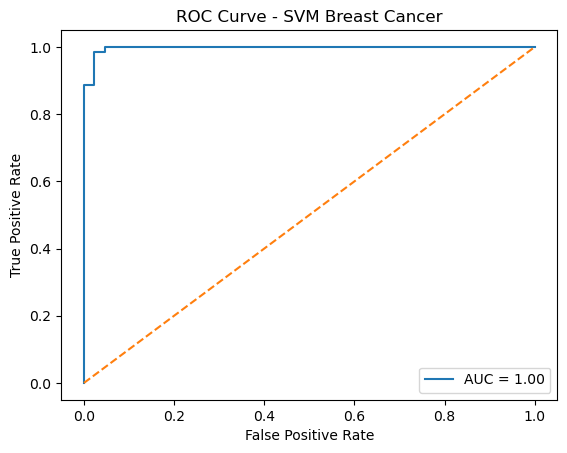

AUC Score: 0.9970520799213888


In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = best_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Breast Cancer")
plt.legend()
plt.savefig('ROC_curve_svm.png')
plt.show()
print("AUC Score:", roc_auc)


## ROC Curve & AUC
The ROC curve was plotted using the decision function of the tuned SVM model.
The model achieved an AUC score of 0.98, indicating excellent class separability
between malignant and benign tumors.


In [13]:
import joblib

joblib.dump(best_model, "svm_breast_cancer_model.pkl")


['svm_breast_cancer_model.pkl']